### data fusion  lab

 Activate Google Cloud Shell <br>
gcloud auth list <br> 
gcloud config list project  <br>
-- disable datafusion <br>
gcloud services disable datafusion.googleapis.com <br>
✓ Check project permissions <br>
✓ Creating a Cloud Data Fusion instance 
Enable Cloud Data Fusion API <br>
✓ Data Fusion > Create an Instance. <br>
name: what you want  <br>
Edition type : Basic <br>
Authorization : Grant Permission <br>
It need 15 minutes to complete <br>
✓ Copy the service account to your clipboard <br>

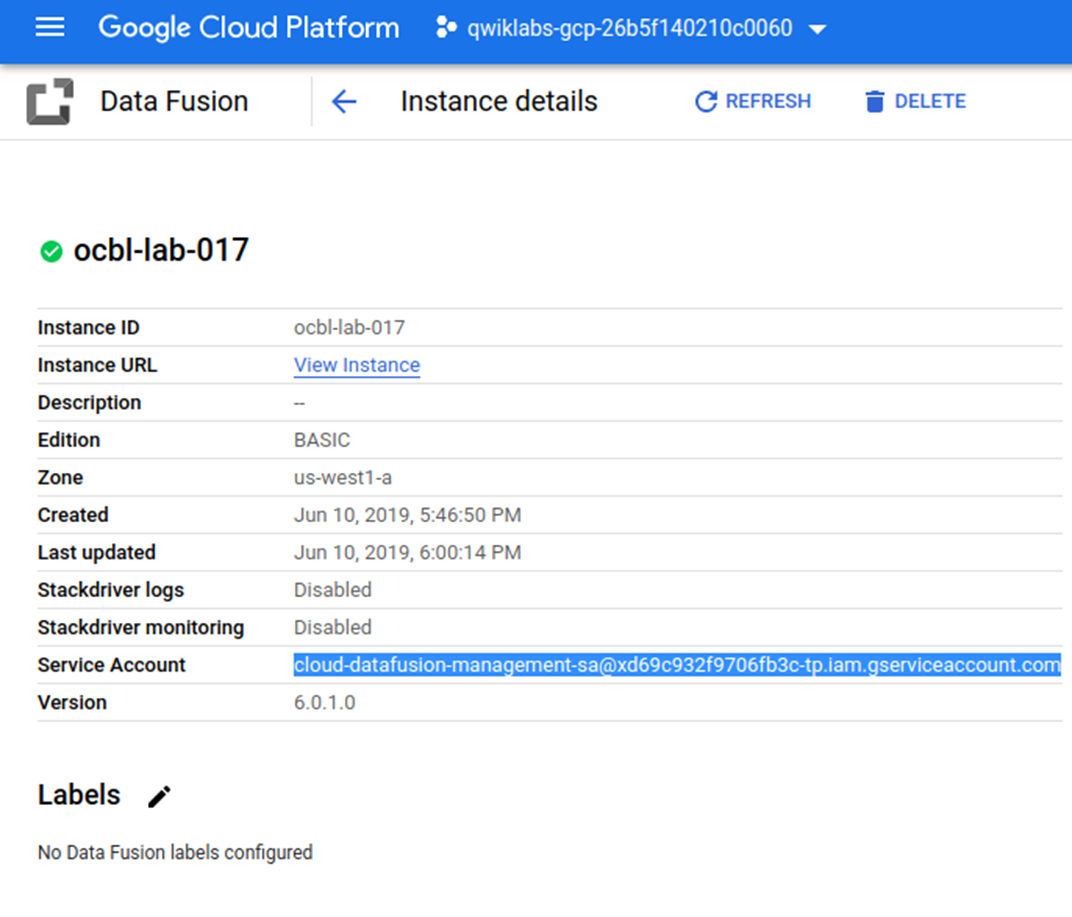

Cloud data Fusion is fully managed, cloud native,enterprise data integration service for quick building and managing data pipelines
Benefits:
1. Serverless
2. Fully managed
3. Integrate with any data source
4. reduce complexity
5. increase productivity
6. increase flexibility

Build data pipelines:
* Rich graphical interface
* 100+ connectors,transformations, and actions
* code free
* 1000+ transforms,data quality 
* test and debug pipelines

### components of data fusion
1- wrangler: data preparation/ perform data cleansing and transformation <br>
2- data fusion studio: graphical interface to build data pipelines (ETL) <br>
3- data fusion engine: run data pipelines <br>
4- metadata: data catalog, track flow of data (lineage), data quality <br>
5- Micrservice framework: REST API, CLI, SDK <br>
6- Event condition action framework: event based triggers, schedule based triggers, data quality alerts <br>

### Configuration(add role )
✓ IAM & Admin > IAM <br>
✓ On the IAM Permissions page, add the service account  <br>
you copied earlier as a new member and grant 
the Cloud Data Fusion API Service Agent role, by 
clicking the Add button. <br>

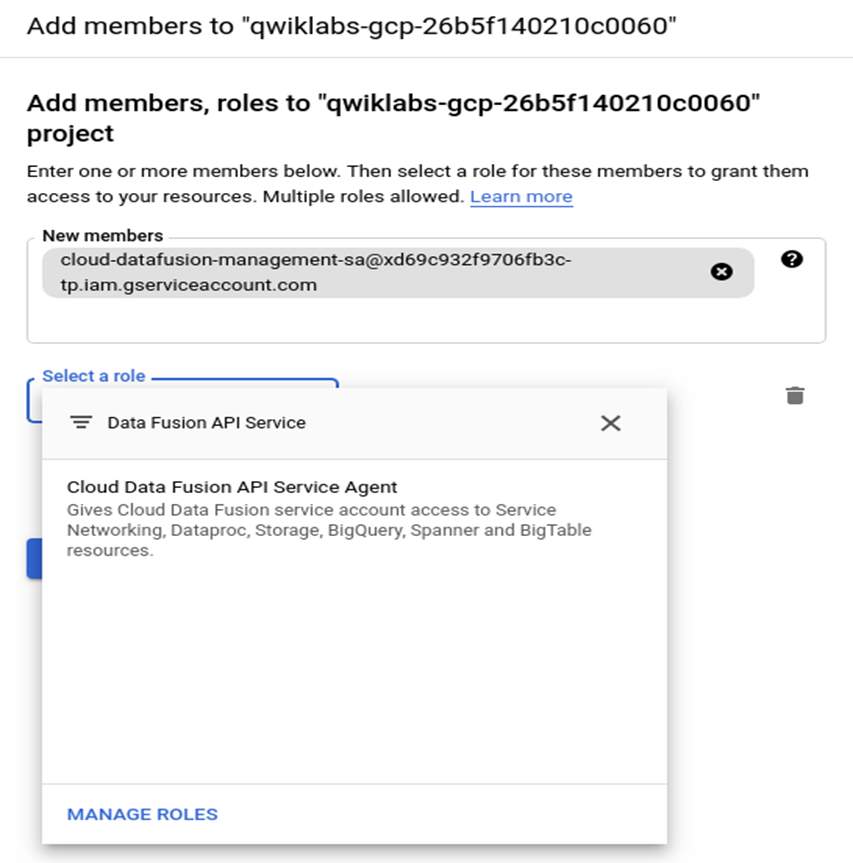

### Preparing(Loading the data, wrangler (clean data))
✓ export BUCKET=$GOOGLE_CLOUD_PROJECT <br>
gsutil mb gs://$BUCKET <br>
gsutil cp gs://cloud-training/OCBL017/ny-taxi-2018-sample.csv gs://$BUCKET <br>
✓ #create a bucket for temporary storage items that Cloud data Fusion will create.
gsutil mb gs://$BUCKET-temp <br>
✓ View Instance link on the Cloud Data Fusion instances page <br>
✓ Wrangler is an interactive, visual tool that lets you see the effects of transformations on a small 
subset of your data before dispatching large, parallel-processing jobs on the entire dataset. On the 
Cloud Data Fusion UI, choose Wrangler. On the left side, there is a panel with the pre-configured 
connections to your data, including the Cloud Storage connection. <br>
✓ Under Google Cloud Storage, select Cloud Storage Default. <br>
✓ Click on the bucket corresponding to your project name. <br>
✓ Select ny-taxi-2018-sample.csv. The data is loaded into the Wrangler screen in row/column form. <br>

### wrangler (clean data)
✓ Parse > CSV, select Set first row as header and then click Apply <br>
✓ Delete column body <br>
✓ column types have been loaded in as String <br>
✓ Change data type trip_distance , total_amount column,Float.  <br>
✓ trip_distance column and select Filter. Click if Custom 
condition and input >0.0 <br>

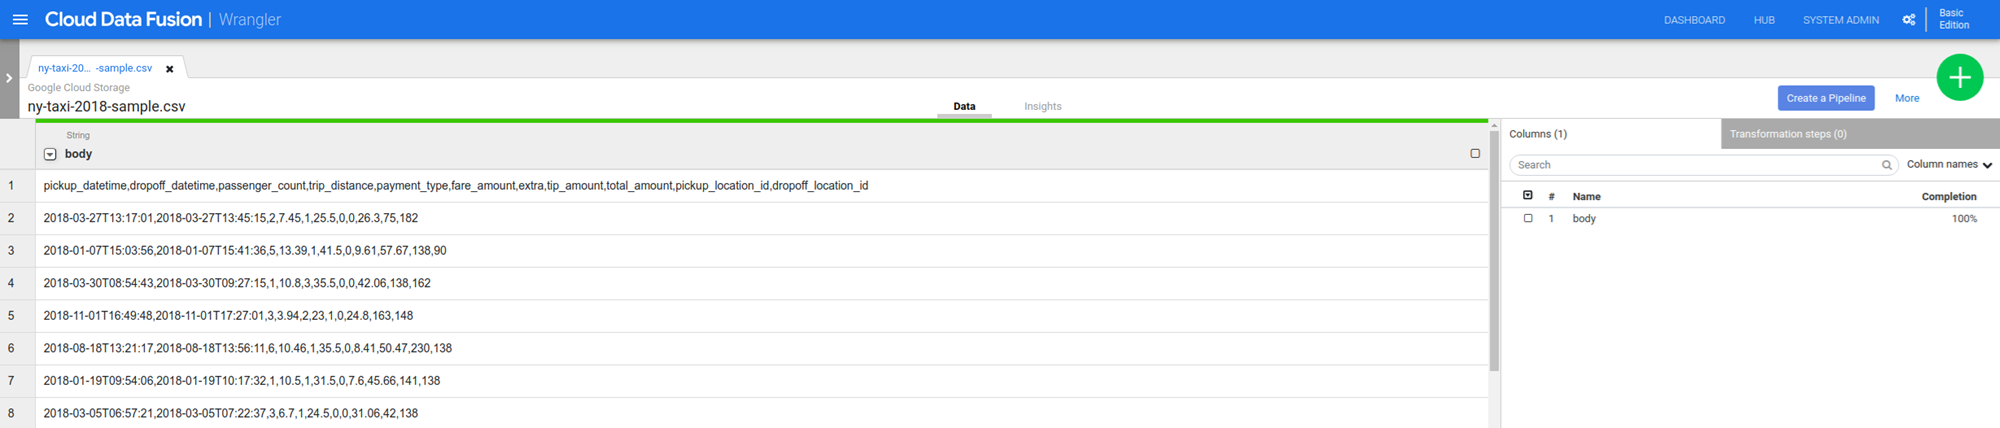

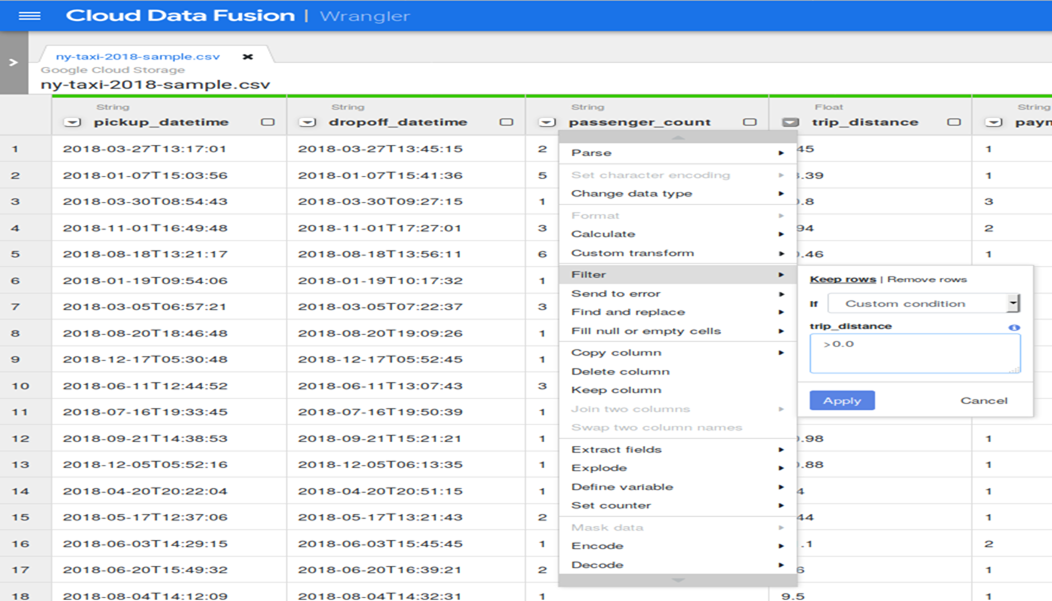

### Creating pipeline
Cloud Data Fusion translates your visually built pipeline into an Apache Spark or MapReduce program that executes 
transformations on an ephemeral Cloud Dataproc cluster in parallel. This enables you to easily execute complex 
transformations over vast quantities of data in a scalable, reliable manner, without having to wrestle with infrastructure 
and technology. <br>
1.On the upper-right side of the Google Cloud Fusion UI, click Create a Pipeline. <br>
2.In the dialog that appears, select Batch pipeline. <br>
3.In the Data Pipelines UI, you will see a GCSFile source node connected to a Wrangler node. The 
Wrangler node contains all the transformations you applied in the Wrangler view captured as 
directive grammar. Hover over the Wrangler node and select Properties. <br>

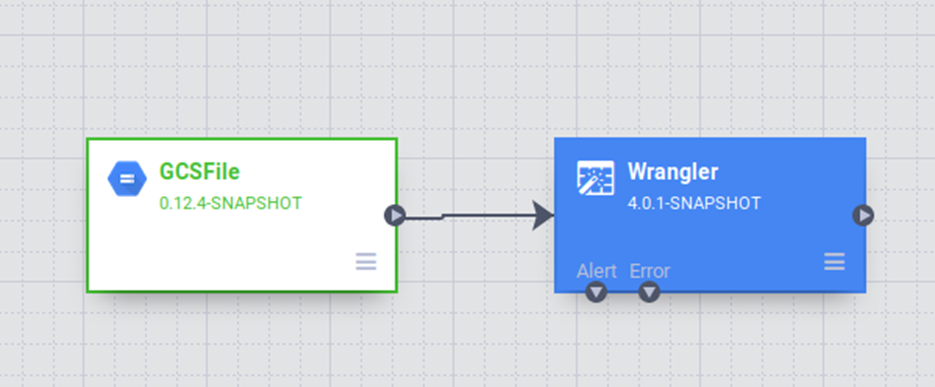

4.At this stage, you can apply more transformations by clicking 
the Wrangle button. Delete the extra column by pressing the red trashcan icon 
beside its name. To close the Wrangler tool click the X button in the top right corner.<br>

### Adding a data source
✓ Create Dataset trips <br>
✓ in bigquery editor More > Query Settings > Set a 
destination table for query results. Also, under Table 
name input zone_id_mapping.  <br>
✓ Run query <br>
```sql
SELECT
zone_id,
zone_name,
borough
FROM
`bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`
```
✓ Cloud Data Fusion > Source > bigquery (add it) and 
click on properties (see next slide to change setting ) <br>

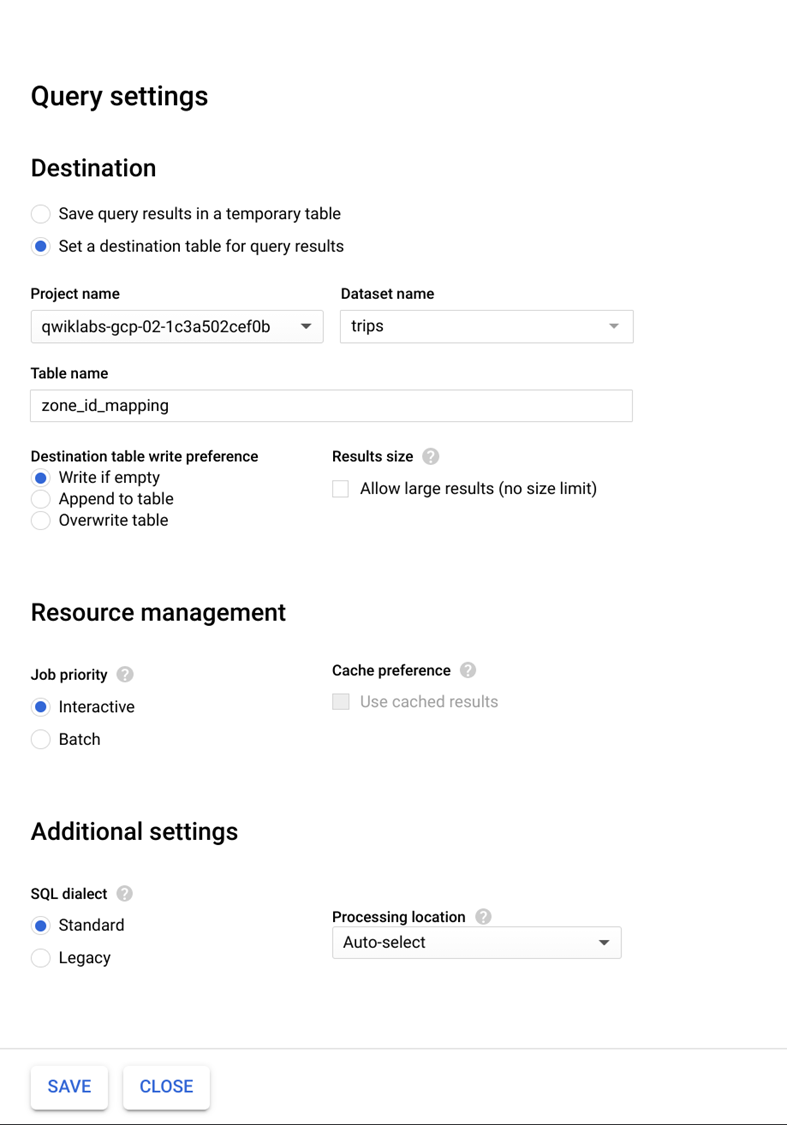

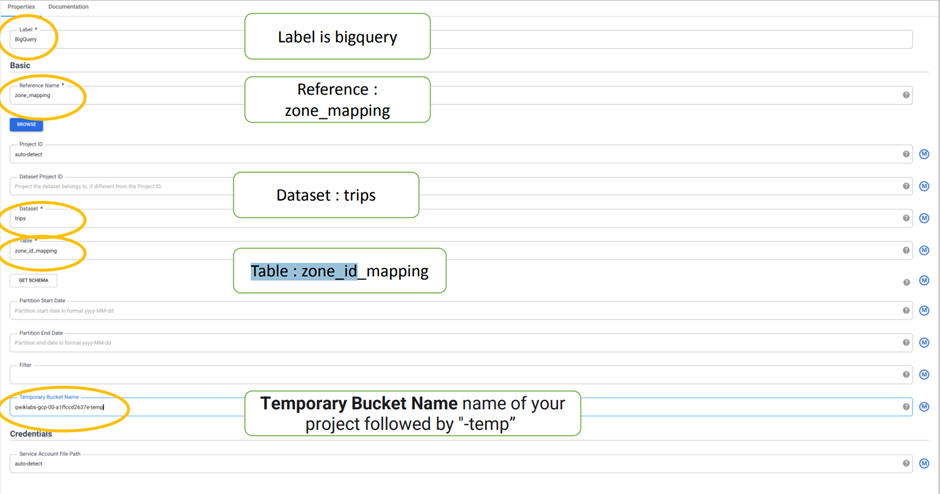

✓ To populate the schema of this table from BigQuery, click Get Schema. The fields will appear on the right side of 
the wizard.
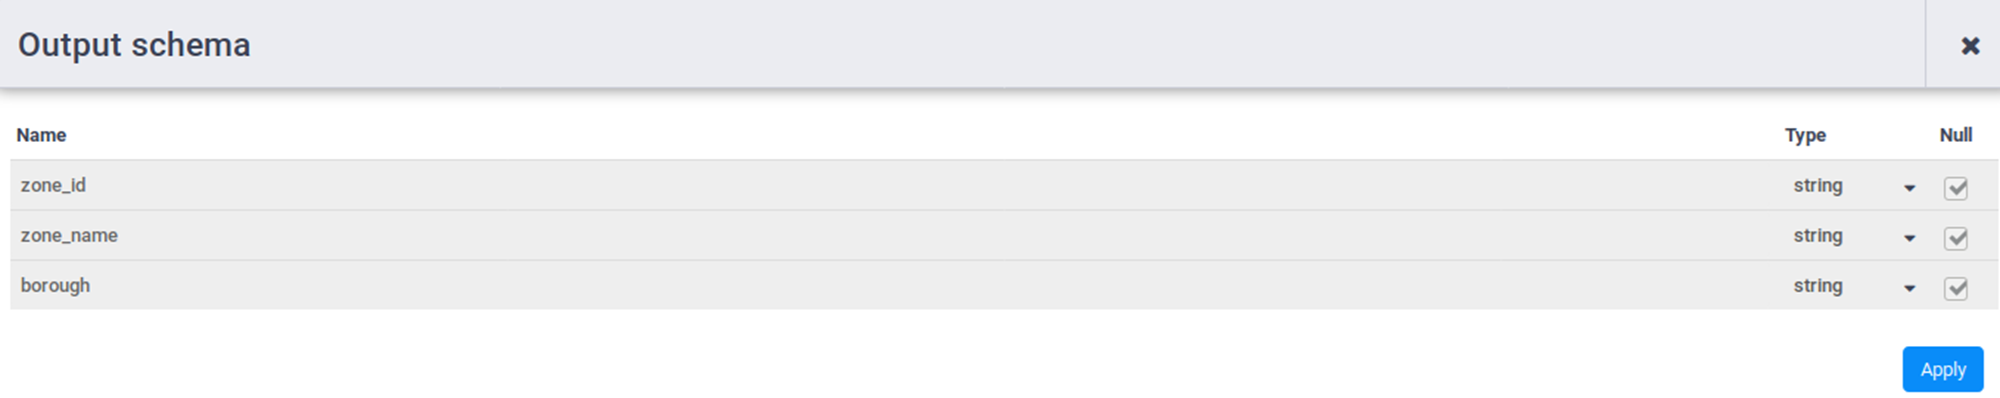
✓ To close the BigQuery Properties window click the X button in the top right corner.

### Joining two sources(add ,properties)

✓ Analytics section > Joiner
✓ Drag a connection arrows as shown in graph
✓ Properties of Joiner 
* Join Type :Inner
* fill join condition 

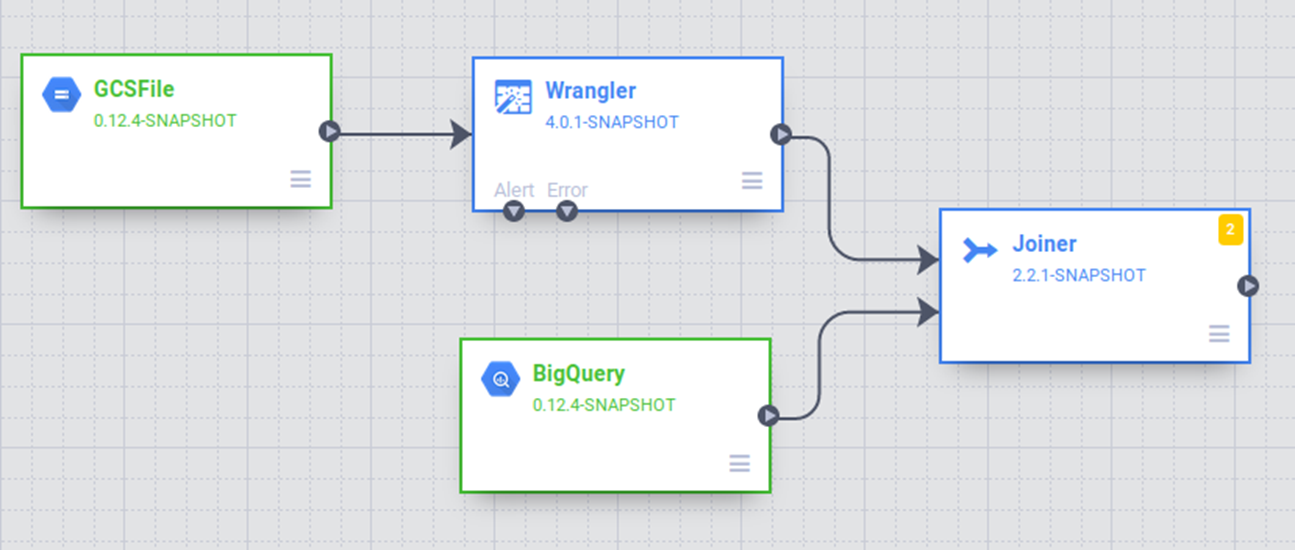

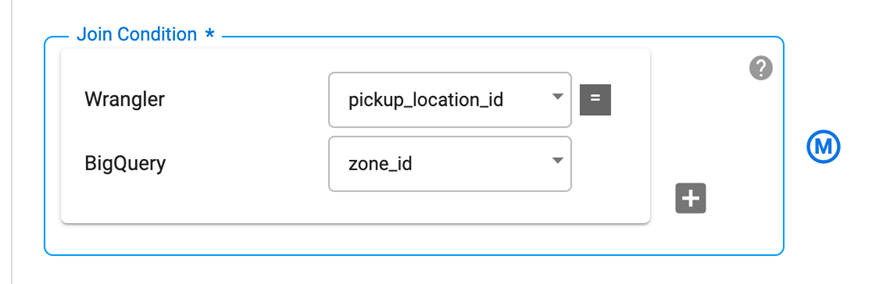

### Joining two sources(properties : remove unnecessary columns)
•To generate the schema of the resultant join, click Get 
Schema. <br>
•In the Output Schema table on the right, remove
the zone_id and pickup_location_id fields by hitting the red 
garbage can icon. <br>
Close the window by clicking the X button in the top 
right corner. <br>
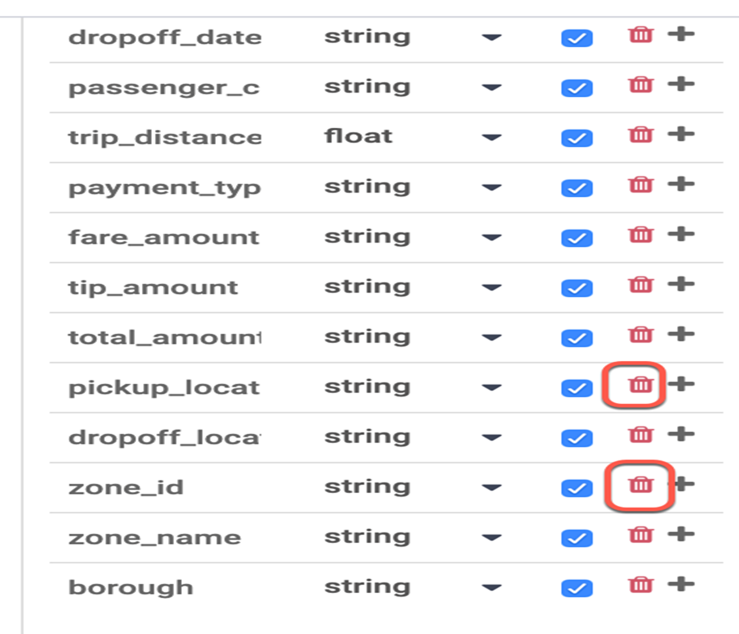

### Storing the output to BigQuery

✓ Sink section >> BigQuery. <br>
✓ Drag a connection arrow <br>
✓ Click on properties (see next slide ) <br>
✓ Close the window <br>

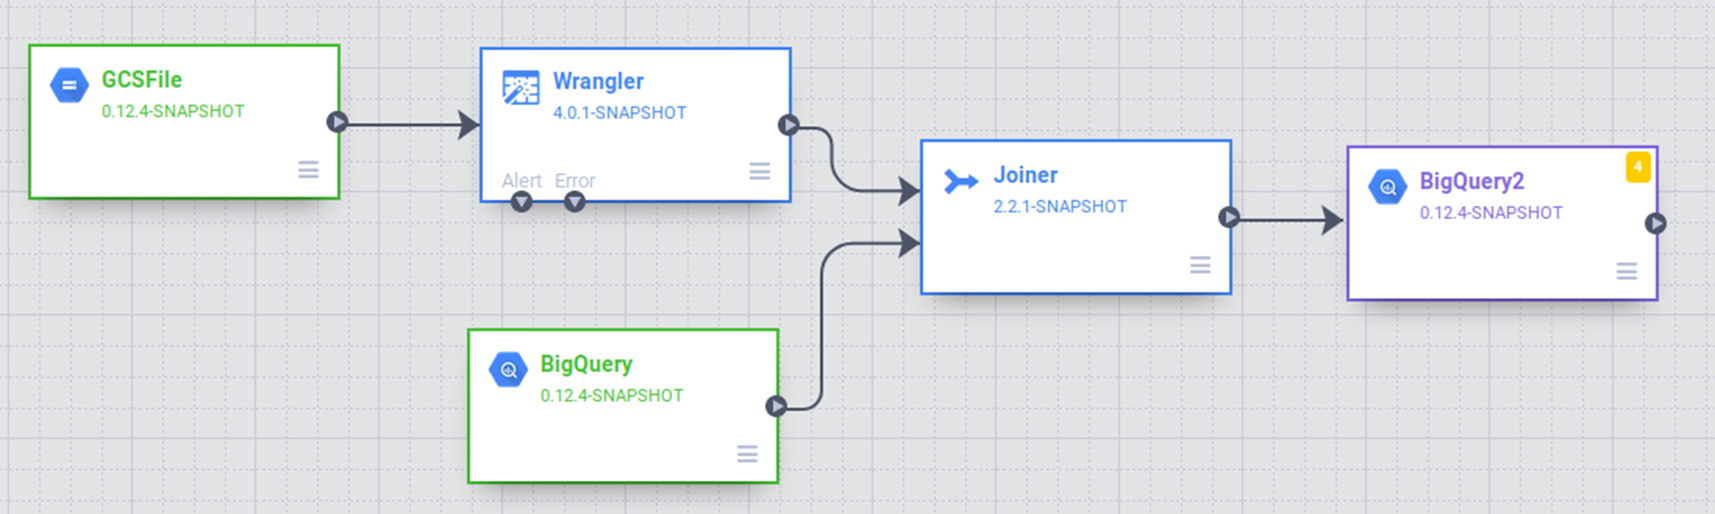

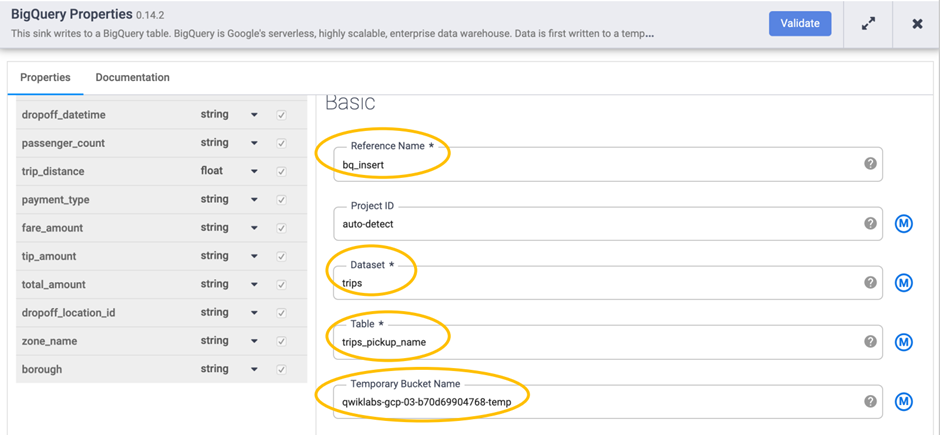



### Deploying and running the pipeline
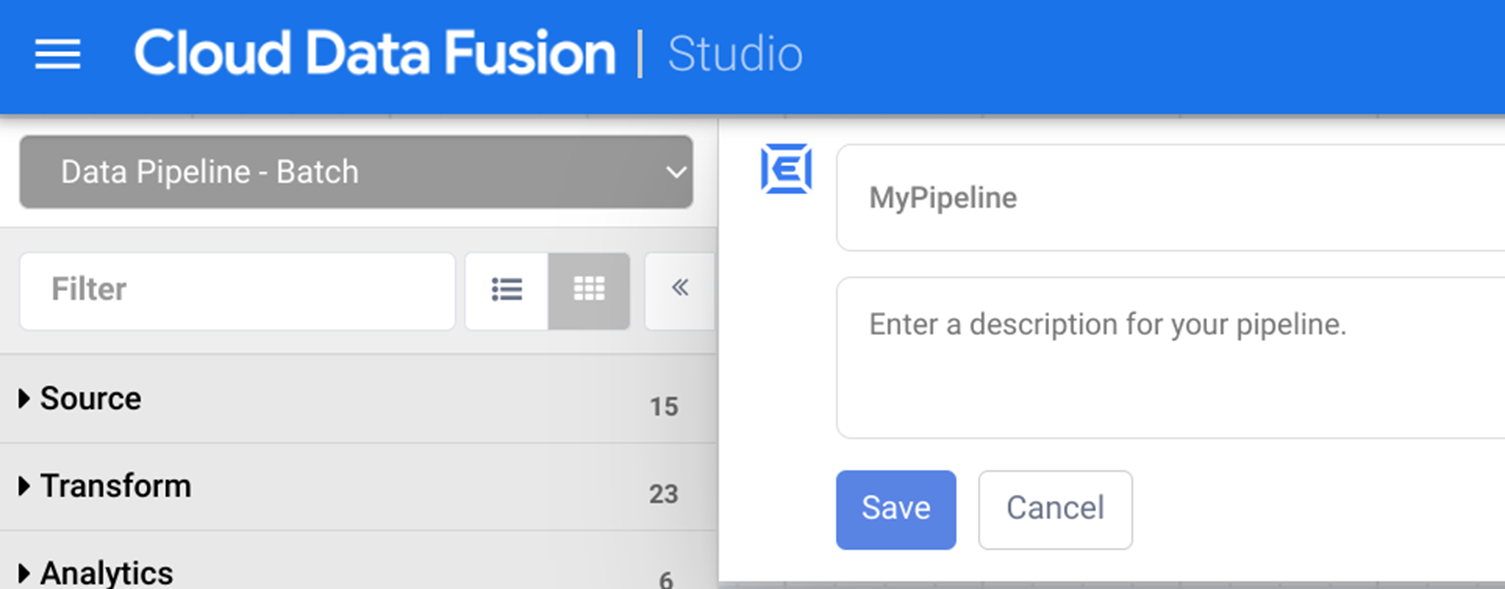
2.Now you will deploy the pipeline. In the upper-right 
corner of the page, click Deploy.

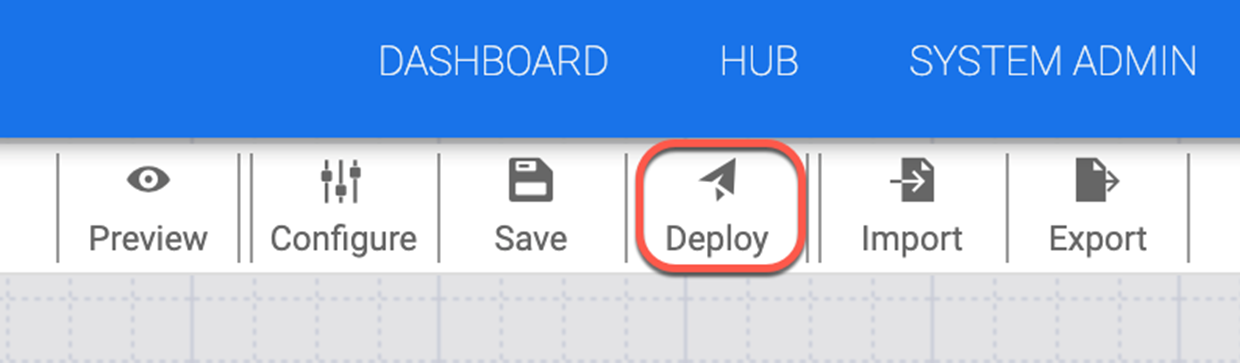

3.On the next screen click Run to start processing data

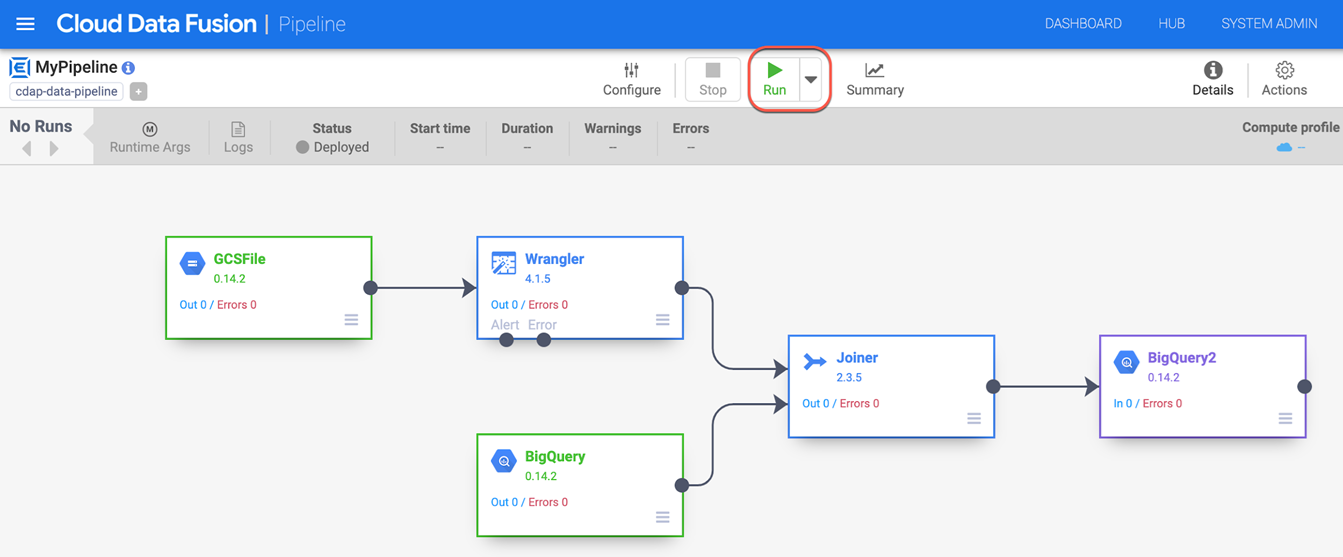
when pipeline is finished successfully, you can see the result in BigQuery
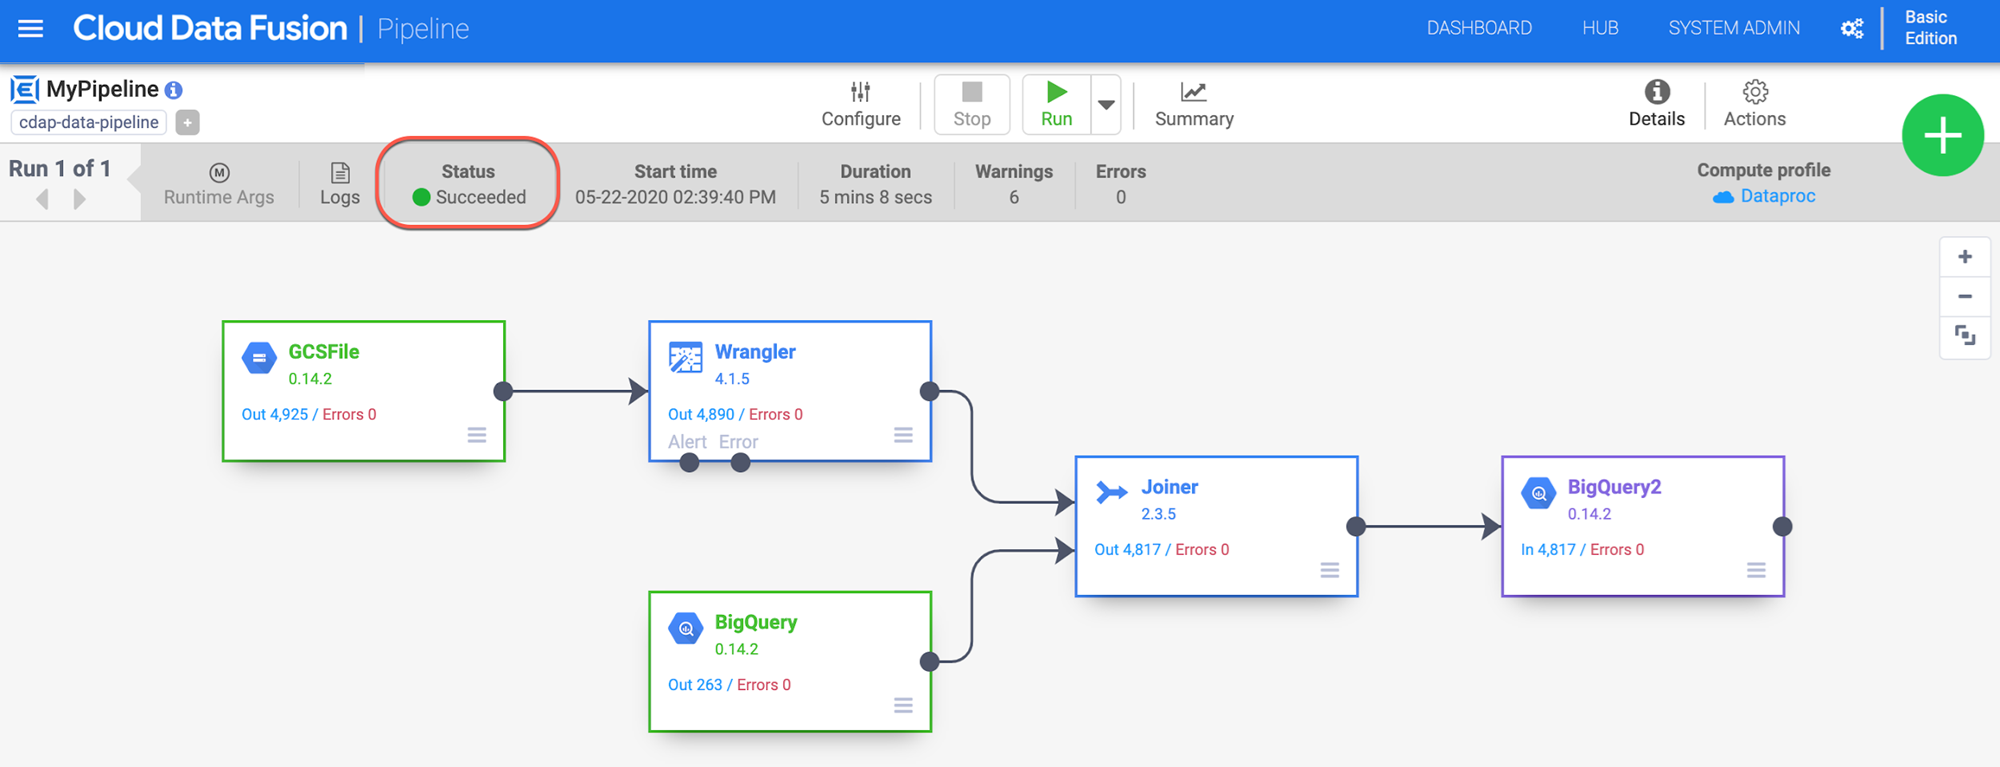

### Viewing result in bigquery
```sql
SELECT * FROM `trips.trips_pickup_name
```
